In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.model_selection import train_test_split, cross_val_score


In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

heart = pd.read_csv(url, header=None, names=columns)

heart = heart.replace("?", pd.NA).dropna()
heart = heart.astype(float)

X = heart.iloc[:, :-1]  
y = heart.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)  # 0 for no disease, 1 for disease

scaler = StandardScaler()
X = scaler.fit_transform(X)


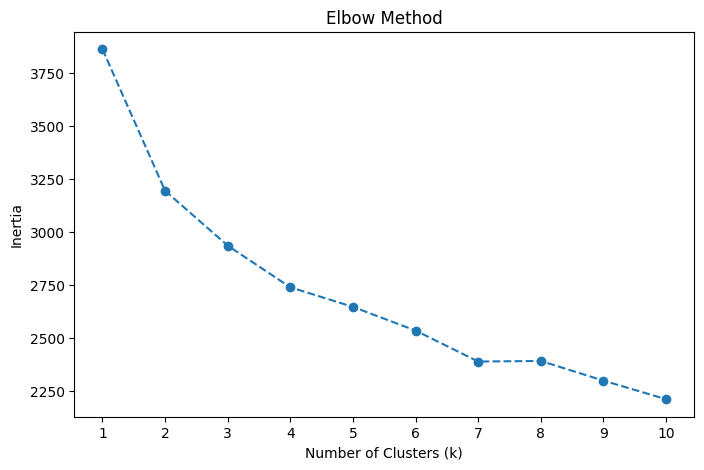

In [34]:

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)


Accuracy: 0.87
(ARI): 0.53


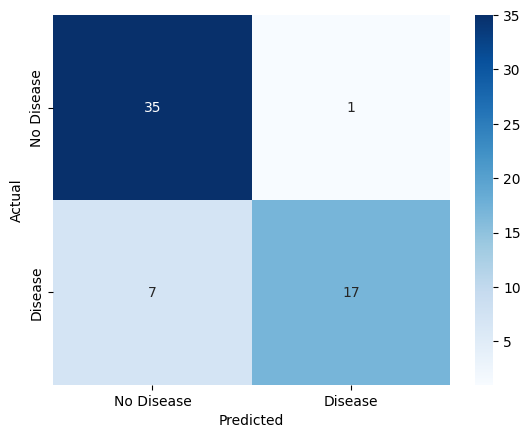

In [36]:
labels = np.zeros_like(y_pred)
for i in range(2):  
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask])[0]
    
    
accuracy = accuracy_score(y_test, labels)
ari = adjusted_rand_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")
conf_matrix = confusion_matrix(y_test, labels)
class_names = ['No Disease', 'Disease']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

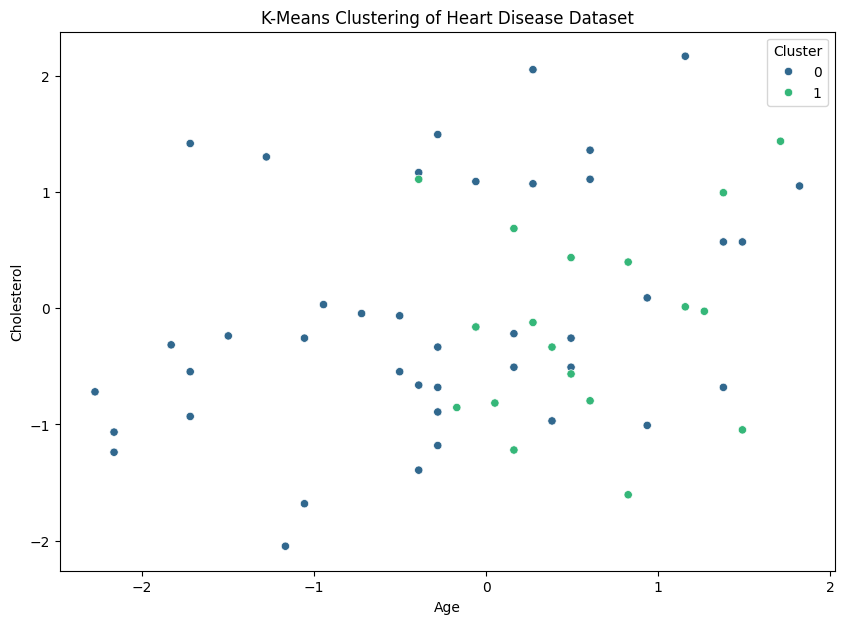

In [37]:
df = pd.DataFrame(X_test, columns=heart.columns[:-1])
df['Cluster'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='chol', hue='Cluster', palette='viridis', data=df, legend='full')
plt.title('K-Means Clustering of Heart Disease Dataset')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()